In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy 
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
tumor_df = mouse_metadata.merge (study_results, on = 'Mouse ID')
# Display the data table for preview
tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [82]:

# Checking the number of mice.
mice_num1 = tumor_df['Mouse ID'].nunique()
print(mice_num1)

249


In [83]:

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = tumor_df.loc[tumor_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicates)

['g989']


In [84]:

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
c_tumor = tumor_df.loc[tumor_df['Mouse ID'] != "g989"]


In [85]:
# Checking the number of mice in the clean DataFrame.
mice_num2 = c_tumor['Mouse ID'].nunique()
print(mice_num2)

248


In [86]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
reg_groups = c_tumor.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
t_mean = reg_groups[('Tumor Volume (mm3)')].mean()
t_median = reg_groups[('Tumor Volume (mm3)')].median()
t_variance = reg_groups[('Tumor Volume (mm3)')].var()
t_std = reg_groups[('Tumor Volume (mm3)')].std()
t_sem = reg_groups[('Tumor Volume (mm3)')].sem()

# Summary Data Frame
t_stats = pd.DataFrame({"Tumor Vol Mean" : t_mean, "Tumor Vol Median" : t_median, "Tumor Vol Variance" : t_variance, "Tumor Vol STD" : t_std, "Tumor Vol SEM" : t_sem})
pd.set_option("display.precision", 2)
t_stats

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol STD,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


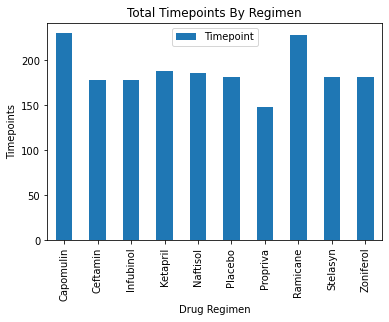

In [87]:
# Using the aggregation method, produce the same summary statistics in a single line
reg_groups['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Count the timepoints by group
regimen_timepoints = reg_groups.agg({"Timepoint":"count"})

#Generate Bar Graph
regimen_timepoints.plot(kind="bar")
plt.title("Total Timepoints By Regimen")
plt.ylabel("Timepoints")
plt.show()

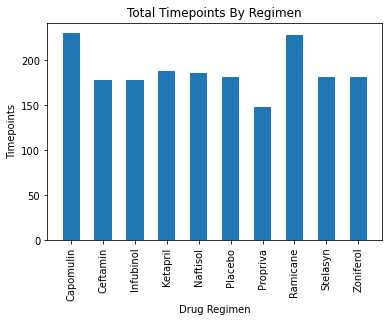

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Set x and y data values
c_tumor1= c_tumor.sort_values(by=['Drug Regimen'])

set_x = c_tumor1["Drug Regimen"].unique()
set_y = regimen_timepoints["Timepoint"]

#Establish dataframe with the values
plt.bar(set_x, set_y, width = .54)

#Chart editing
plt.title("Total Timepoints By Regimen")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

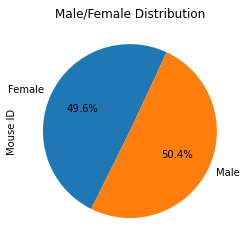

In [89]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group Unique mice by sex
male_female = c_tumor.groupby("Sex").nunique()["Mouse ID"]

#Establish Pie Chart 
male_female.plot(kind="pie", autopct='%1.1f%%', startangle=65)
plt.title("Male/Female Distribution")
plt.show()

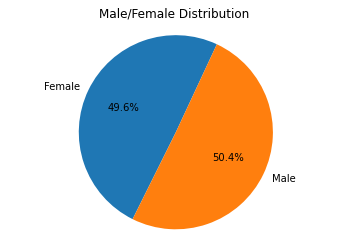

In [90]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
pie, pie1 = plt.subplots()
pie1.pie(male_female, labels=labels, autopct='%1.1f%%', startangle=65)
pie1.axis('equal')
plt.title("Male/Female Distribution")
plt.show()

In [91]:

# Capomulin,Ramicane, Infubinol, and Ceftamin
unique_mouse = c_tumor.groupby('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse
last_time = unique_mouse["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(c_tumor, last_time, on = "Mouse ID")
cleaned = merged.drop_duplicates(subset = ['Mouse ID', 'Timepoint_y'], keep = 'last').reset_index(drop = True)

#Rename Columns in merged dataset
cleaned.rename(columns={"Timepoint_y": "Last Time"}, inplace = True)
cleaned.rename(columns={"Tumor Volume (mm3)": "Final Tumor Vol (mm3)"}, inplace = True)

#Establish Location for each of the four drug regimens
Capomulin = cleaned.loc[cleaned["Drug Regimen"] == "Capomulin"]
Ramicane = cleaned.loc[cleaned["Drug Regimen"] == "Ramicane"]
Infubinol = cleaned.loc[cleaned["Drug Regimen"] == "Infubinol"]
Ceftamin = cleaned.loc[cleaned["Drug Regimen"] == "Ceftamin"]

In [92]:
# Put treatments into a list for for loop 

treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list for tumor vol data 
tumor_vol = []

# Calculate the IQR and identify potential outliers. 
for x in treatment:
    final_tumor_vol = cleaned.loc[cleaned["Drug Regimen"]== x]["Final Tumor Vol (mm3)"]
    tumor_vol.append(final_tumor_vol)
    
#Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = (quartiles[0.25])
    upperq = (quartiles[0.75])
    median = (quartiles[0.5])
    iqr = (upperq-lowerq)
#Determine outliers using upper and lower bounds
    low_b = round(lowerq - (1.5*iqr),2)
    up_b = round(upperq + (1.5*iqr),2)
    out = final_tumor_vol.loc[(final_tumor_vol > up_b) | (final_tumor_vol < low_b)]

#Establish condition to display the outlier   
    if out.count() != 0:
        print(f"{x} is potential outlier: {out}.")
print(tumor_vol)

Infubinol is potential outlier: 74    36.32
Name: Final Tumor Vol (mm3), dtype: float64.
[1      23.34
2      28.48
3      28.43
6      30.49
10     31.02
12     31.90
13     32.38
14     33.33
16     34.46
20     37.31
22     36.04
24     37.07
28     38.85
30     38.94
31     38.98
32     38.75
34     38.13
35     39.95
36     40.66
37     40.16
38     40.73
39     41.48
40     41.58
45     47.69
180    46.54
Name: Final Tumor Vol (mm3), dtype: float64, 0     22.05
4     29.13
5     30.28
7     30.56
8     30.64
9     31.56
11    31.10
15    33.40
17    32.98
18    33.56
19    36.13
21    38.81
23    37.23
25    36.37
26    36.56
27    37.31
29    38.34
33    38.41
41    40.66
42    40.67
43    45.22
44    43.05
46    43.42
47    43.17
48    44.18
Name: Final Tumor Vol (mm3), dtype: float64, 49     67.97
50     65.53
57     57.03
58     66.08
70     72.23
74     36.32
82     60.97
90     62.44
95     60.92
111    67.29
123    66.20
127    62.12
145    47.01
149    60.17
161    55.63


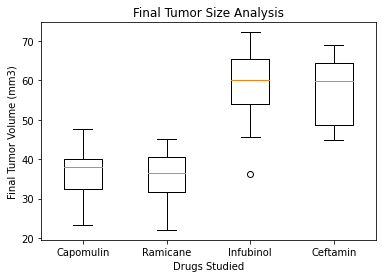

In [93]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Establish Box Plot
plt.boxplot(tumor_vol, labels = treatment)

#Box Plot Formatting 
plt.title("Final Tumor Size Analysis")
plt.xlabel("Drugs Studied")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.00,0
301,b128,Capomulin,Female,9,22,5,45.65,0
302,b128,Capomulin,Female,9,22,10,43.27,0
303,b128,Capomulin,Female,9,22,15,43.78,0
304,b128,Capomulin,Female,9,22,20,42.73,0
305,b128,Capomulin,Female,9,22,25,43.26,1
306,b128,Capomulin,Female,9,22,30,40.61,1
307,b128,Capomulin,Female,9,22,35,37.97,1
308,b128,Capomulin,Female,9,22,40,38.38,2
309,b128,Capomulin,Female,9,22,45,38.98,2


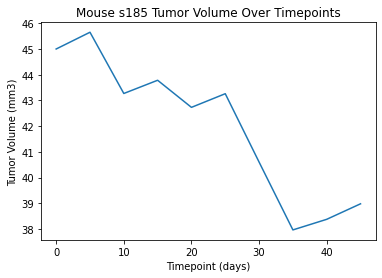

In [94]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Find and Select the mouse location by mouse ID
mouse_b128 = c_tumor.loc[c_tumor["Mouse ID"]=="b128"]

#Use mouse location to establish line chart for mouse S185 for time and tumor volume
plt.plot(mouse_b128['Timepoint'], mouse_b128['Tumor Volume (mm3)'])

#Chart formating 
plt.title("Mouse s185 Tumor Volume Over Timepoints")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
mouse_b128

Text(0.5, 0, 'Mouse Tumor Vol (mm3)')

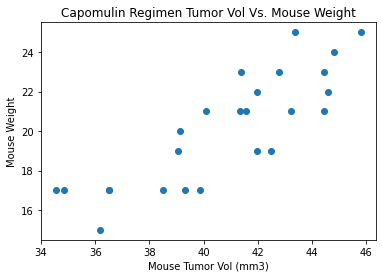

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Find location of Capomulin 
cap = c_tumor.loc[c_tumor["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

#x values
tumorvol_avg = cap['Tumor Volume (mm3)'].mean()

#y values
cap_w = c_tumor.loc[c_tumor["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
cap_weight = cap_w["Weight (g)"].mean()

#Establish Scatter Plot
plt.scatter(tumorvol_avg, cap_weight)

#Chart Formating 
plt.title("Capomulin Regimen Tumor Vol Vs. Mouse Weight")
plt.ylabel("Mouse Weight")
plt.xlabel("Mouse Tumor Vol (mm3)")

The correlation coefficient between Mouse Tumor Vol (mm3) and Mouse Weight is 0.84


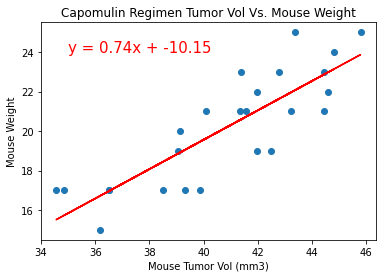

In [96]:

#Calculate and pring correlation coefficient
print(f"The correlation coefficient between Mouse Tumor Vol (mm3) and Mouse Weight is {round(st.pearsonr(tumorvol_avg,cap_weight)[0],2)}")

#Duplicate chart above
plt.scatter(tumorvol_avg, cap_weight)

#Linear regression equation
(slope, intercept, rvalue, pvalue, std_err) = linregress(tumorvol_avg, cap_weight)
regress_values = tumorvol_avg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Place Regression line on plot
plt.plot(tumorvol_avg,regress_values,"r-")
plt.title("Capomulin Regimen Tumor Vol Vs. Mouse Weight")
plt.xlabel('Mouse Tumor Vol (mm3)')
plt.ylabel('Mouse Weight')
plt.annotate(line_eq,(35,24),fontsize=15,color="red")
plt.show()